In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns

In [2]:
def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [3]:
measurements = pd.read_sql("SELECT* from measurements", get_db_url('iris_db'))

In [4]:
species = pd.read_sql("SELECT* from species", get_db_url('iris_db'))

In [5]:
# Use the iris database to answer the following quesitons:



In [6]:
measurements = pd.merge(measurements, species, left_on='species_id', right_on='species_id', how='left')

In [51]:
measurements

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa
5,6,5.4,3.9,1.7,0.4,1,setosa
6,7,4.6,3.4,1.4,0.3,1,setosa
7,8,5.0,3.4,1.5,0.2,1,setosa
8,9,4.4,2.9,1.4,0.2,1,setosa
9,10,4.9,3.1,1.5,0.1,1,setosa


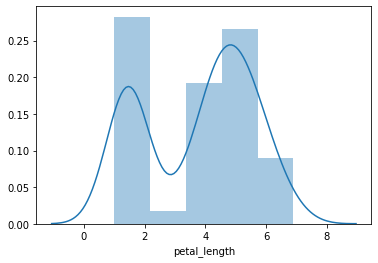

In [8]:
# What does the distribution of petal lengths look like?

sns.distplot(measurements.petal_length)

# Looks like bimodal distribution

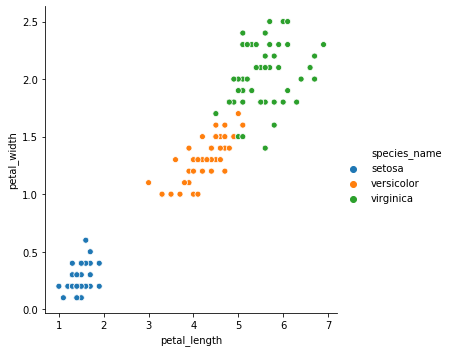

In [9]:
# Is there a correlation between petal length and petal width?

sns.relplot(x='petal_length', y='petal_width', hue = 'species_name', data=measurements)

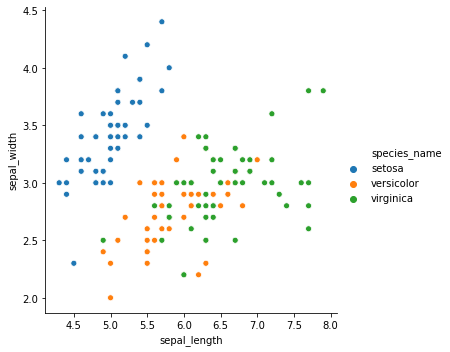

In [10]:
# Would it be reasonable to predict species based on sepal width and sepal length?

sns.relplot(x='sepal_length', y='sepal_width', hue = 'species_name', data=measurements)

In [11]:
# Which features would be best used to predict species?
#petal length and petal width

In [17]:
# Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 
# Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset.
# What do you notice?

# different distributions can have same mean, std etc. Outliers can have big impact on mean std dev etc.

anscombe = sns.load_dataset('anscombe')
anscombe.head(5)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [18]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

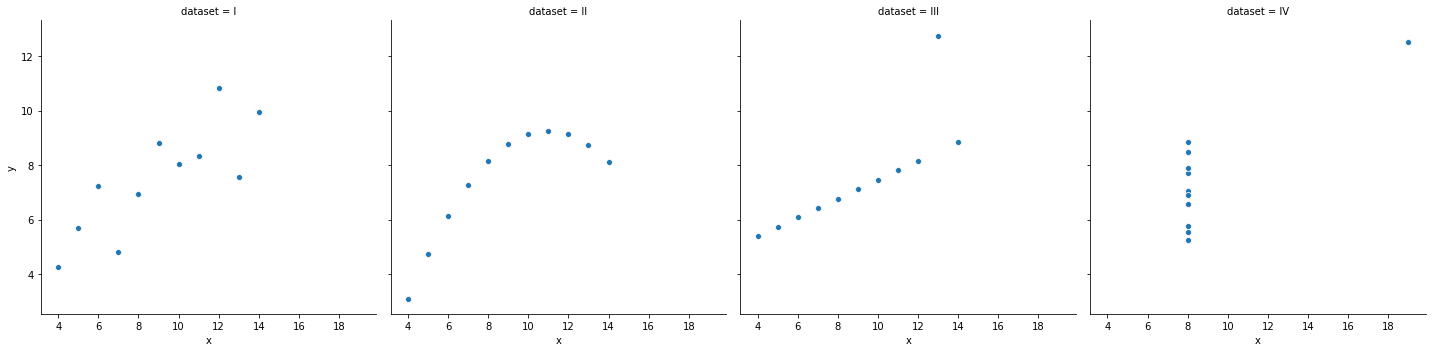

In [19]:
# Plot the x and y values from the anscombe data. Each dataset should be in a separate column

sns.relplot(data = anscombe, x = 'x', y ='y', col = 'dataset')

In [29]:
# Load the InsectSprays dataset and read it's documentation. 
# Create a boxplot that shows the effectiveness of the different insect sprays

InsectSprays = data('InsectSprays')
InsectSprays.head(5)

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


Text(0.5, 1.0, 'Effectiveness of the different insect sprays')

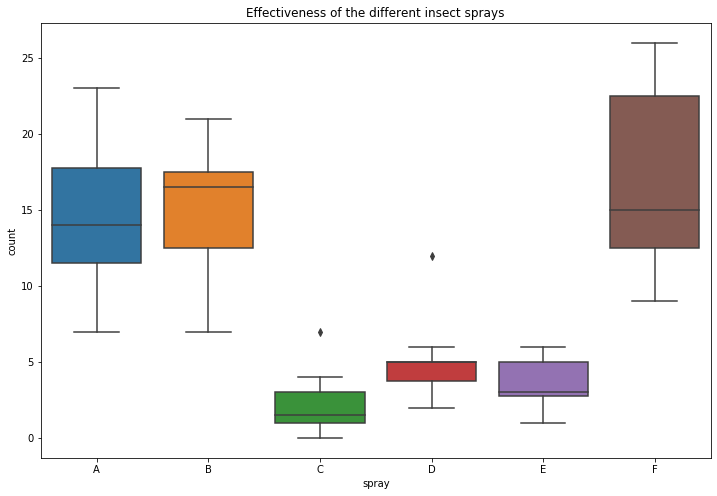

In [34]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=InsectSprays, y='count', x= 'spray')
plt.title('Effectiveness of the different insect sprays')

In [ ]:
# Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

# Does whether or not a province is Catholic influence fertility?
# What measure correlates most strongly with fertility?


In [37]:
swiss = data('swiss')
swiss.head(5)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [49]:
# Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. 
# (Choose a cutoff point for what constitutes catholic)

swiss['is_catholic'] = swiss.Catholic > 50.0


Text(0.5, 1.0, 'E')

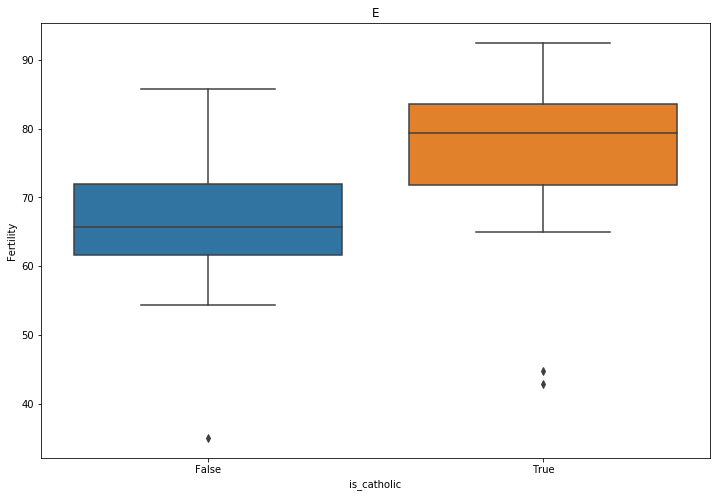

In [50]:
# Does whether or not a province is Catholic influence fertility?

plt.figure(figsize=(12, 8))

sns.boxplot(data=swiss, y='Fertility', x= 'is_catholic')
plt.title('E')

In [53]:
# What measure correlates most strongly with fertility?

sns.pairplot(swiss[swiss.Fertility])



KeyError: "None of [Float64Index([80.2, 83.1, 92.5, 85.8, 76.9, 76.1, 83.8, 92.4, 82.4, 82.9, 87.1,\n              64.1, 66.9, 68.9, 61.7, 68.3, 71.7, 55.7, 54.3, 65.1, 65.5, 65.0,\n              56.6, 57.4, 72.5, 74.2, 72.0, 60.5, 58.3, 65.4, 75.5, 69.3, 77.3,\n              70.5, 79.4, 65.0, 92.2, 79.3, 70.4, 65.7, 72.7, 64.4, 77.6, 67.6,\n              35.0, 44.7, 42.8],\n             dtype='float64')] are in the [columns]"